# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load CB raw dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/cord_blood/data/cord_blood_raw_dr_20200717.h5ad')

In [5]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [6]:
adata.raw = adata

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD8 T cell          16345
CD14 monocyte       13324
CD16 monocyte         888
CD56 bright NK       4066
CMP                   272
DC1                    67
DC2                   155
DC precursor          169
GMP                   203
HSC                   194
ILC precursor        1519
MEMP                  338
MK                   1262
early MK              496
early erythroid       532
late erythroid        878
mature NK            7860
mid erythroid        2627
myelocyte            3726
naive B cell        19516
naive CD4 T cell    69338
neutrophil           3458
pDC                   242
preDC                 269
promonocyte           607
tDC                    91
dtype: int64

# Add broad annotation as metadata and accompanying colours

In [8]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/key_cb_broad_annots_20200721.csv")

In [9]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['CD8 T cell',
 'CD14 monocyte',
 'CD16 monocyte',
 'CD56 bright NK',
 'CMP',
 'DC1',
 'DC2',
 'DC precursor',
 'GMP',
 'HSC',
 'ILC precursor',
 'MEMP',
 'MK',
 'early MK',
 'early erythroid',
 'late erythroid',
 'mature NK',
 'mid erythroid',
 'myelocyte',
 'naive B cell',
 'naive CD4 T cell',
 'neutrophil',
 'pDC',
 'preDC',
 'promonocyte',
 'tDC',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [10]:
broad_annot = annot["broad_cell.labels"].tolist()
broad_annot

['T/NK',
 'monocyte',
 'monocyte',
 'T/NK',
 'HSC/MPP',
 'DC',
 'DC',
 'DC',
 'HSC/MPP',
 'HSC/MPP',
 'T/NK',
 'HSC/MPP',
 'MK',
 'MK',
 'erythroid',
 'erythroid',
 'T/NK',
 'erythroid',
 'neutrophil',
 'B cells',
 'T/NK',
 'neutrophil',
 'DC',
 'DC',
 'monocyte',
 'DC',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [11]:
adata.obs["cell.labels_broad"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [12]:
adata.obs["cell.labels_broad"] = adata.obs["cell.labels_broad"].astype('category')
adata.obs["cell.labels_broad"].cat.categories

Index(['B cells', 'DC', 'HSC/MPP', 'MK', 'T/NK', 'erythroid', 'monocyte', 'neutrophil'], dtype='object')

In [13]:
adata.obs["cell.labels_broad"] = adata.obs["cell.labels_broad"].cat.reorder_categories(['HSC/MPP', 'erythroid', 
                        'MK', 'B cells', 'DC', 'neutrophil', 'monocyte', 'T/NK'])

In [14]:
adata.obs["cell.labels_broad"] = adata.obs["cell.labels_broad"].astype('category')
adata.obs["cell.labels_broad"].cat.categories

Index(['HSC/MPP', 'erythroid', 'MK', 'B cells', 'DC', 'neutrophil', 'monocyte', 'T/NK'], dtype='object')

In [15]:
adata.obs["cell.labels_broad"].cat.categories[2]

'MK'

In [16]:
new_colors = np.empty(len(adata.obs["cell.labels_broad"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#f59771' # erythroid
new_colors[[2]] = '#8e88a8' # MK
new_colors[[3]] = '#d1db94' # B cells
new_colors[[4]] = '#4d78bc' # DC
new_colors[[5]] = '#f3c3db' # neutrophil
new_colors[[6]] = '#86b3e0' # monocyte
new_colors[[7]] = '#d43d6a' # TNK

adata.uns["cell.labels_broad_colors"] = new_colors

new_colors

array(['#f9f06c', '#f59771', '#8e88a8', '#d1db94', '#4d78bc', '#f3c3db',
       '#86b3e0', '#d43d6a'], dtype=object)

In [17]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD8 T cell          16345
CD14 monocyte       13324
CD16 monocyte         888
CD56 bright NK       4066
CMP                   272
DC1                    67
DC2                   155
DC precursor          169
GMP                   203
HSC                   194
ILC precursor        1519
MEMP                  338
MK                   1262
early MK              496
early erythroid       532
late erythroid        878
mature NK            7860
mid erythroid        2627
myelocyte            3726
naive B cell        19516
naive CD4 T cell    69338
neutrophil           3458
pDC                   242
preDC                 269
promonocyte           607
tDC                    91
dtype: int64

In [18]:
cell_numbers = adata.obs.groupby(["cell.labels_broad"]).apply(len)
cell_numbers

cell.labels_broad
HSC/MPP        1007
erythroid      4037
MK             1758
B cells       19516
DC              993
neutrophil     7184
monocyte      14819
T/NK          99128
dtype: int64

# Pre-process the total dataset

In [19]:
# normalise count data 
sc.pp.normalize_total(adata)

In [20]:
# log the count data 
sc.pp.log1p(adata)

In [21]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [22]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [23]:
# run pca
sc.tl.pca(adata, n_comps=50)

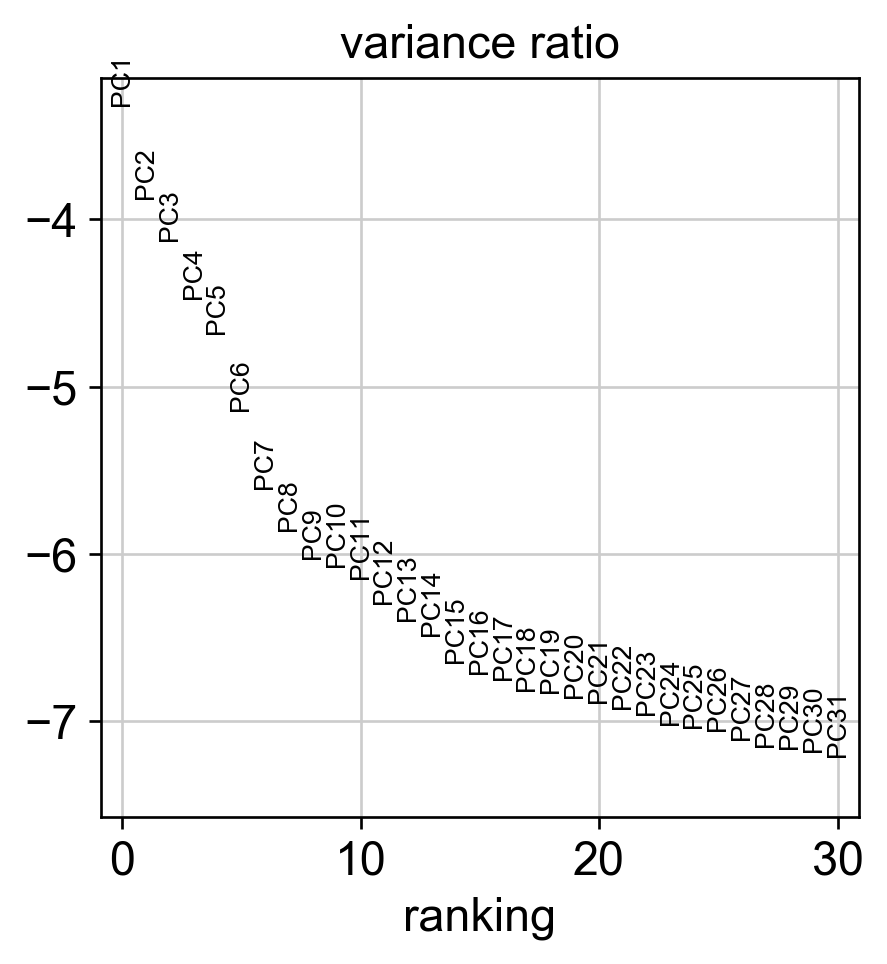

In [24]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=30) 

In [26]:
# run umap
sc.tl.umap(adata) 

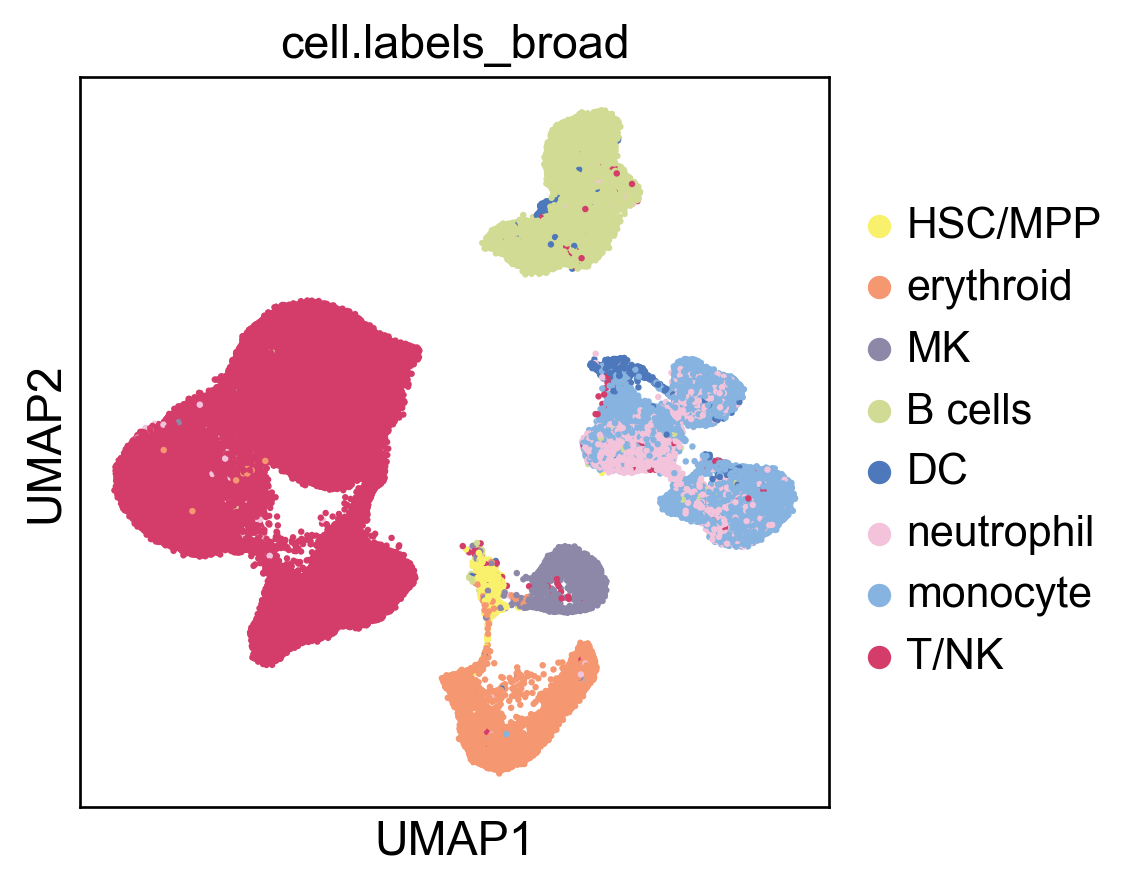

In [27]:
sc.pl.umap(adata, color=['cell.labels_broad'], size=15) 

In [28]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_cb_pre-harmony_20200721_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='cell.labels', save='_cb_pre-harmony_20200721_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='cell.labels_broad', save='_cb_pre-harmony_20200721_labels_broad_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='cell.labels_broad', save='_cb_pre-harmony_20200721_labels_broad_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sample', save='_cb_pre-harmony_20200721_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sample', save='_cb_pre-harmony_20200721_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Run harmony batch correction

In [29]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['sample']

In [30]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [31]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

R[write to console]: Harmony 7/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

In [32]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add UMAP 

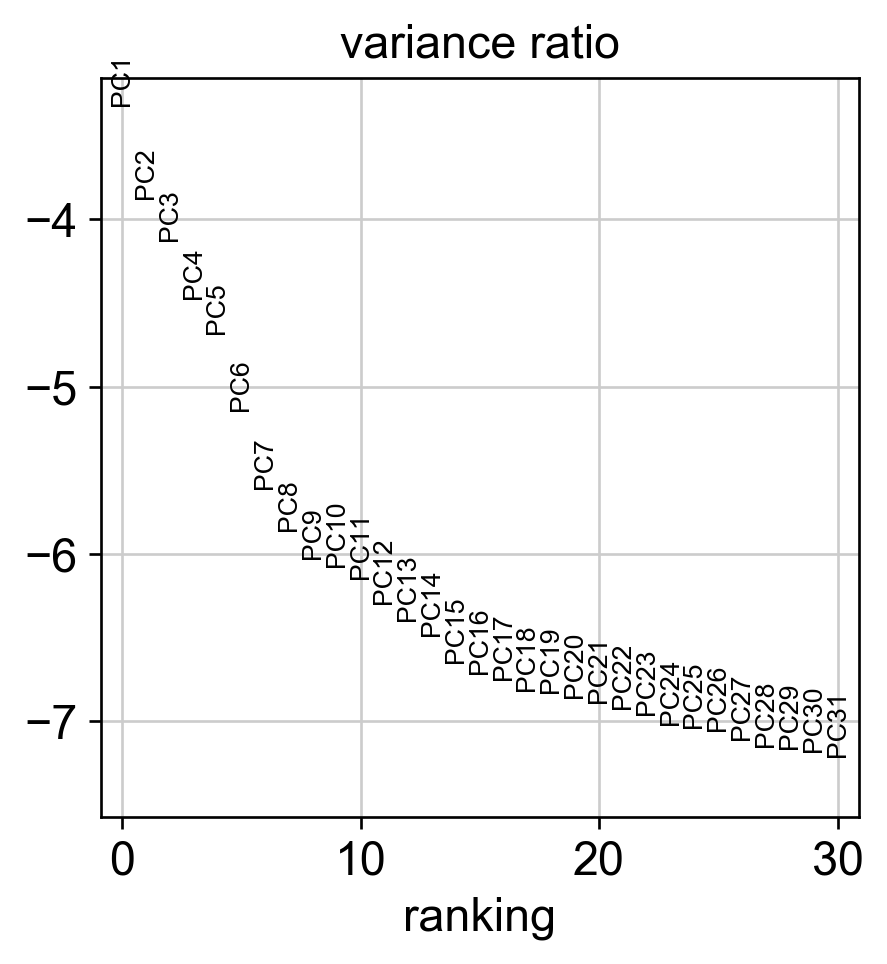

In [33]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [34]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=20) 

In [35]:
# run umap
sc.tl.umap(adata) 

# Plot UMAP

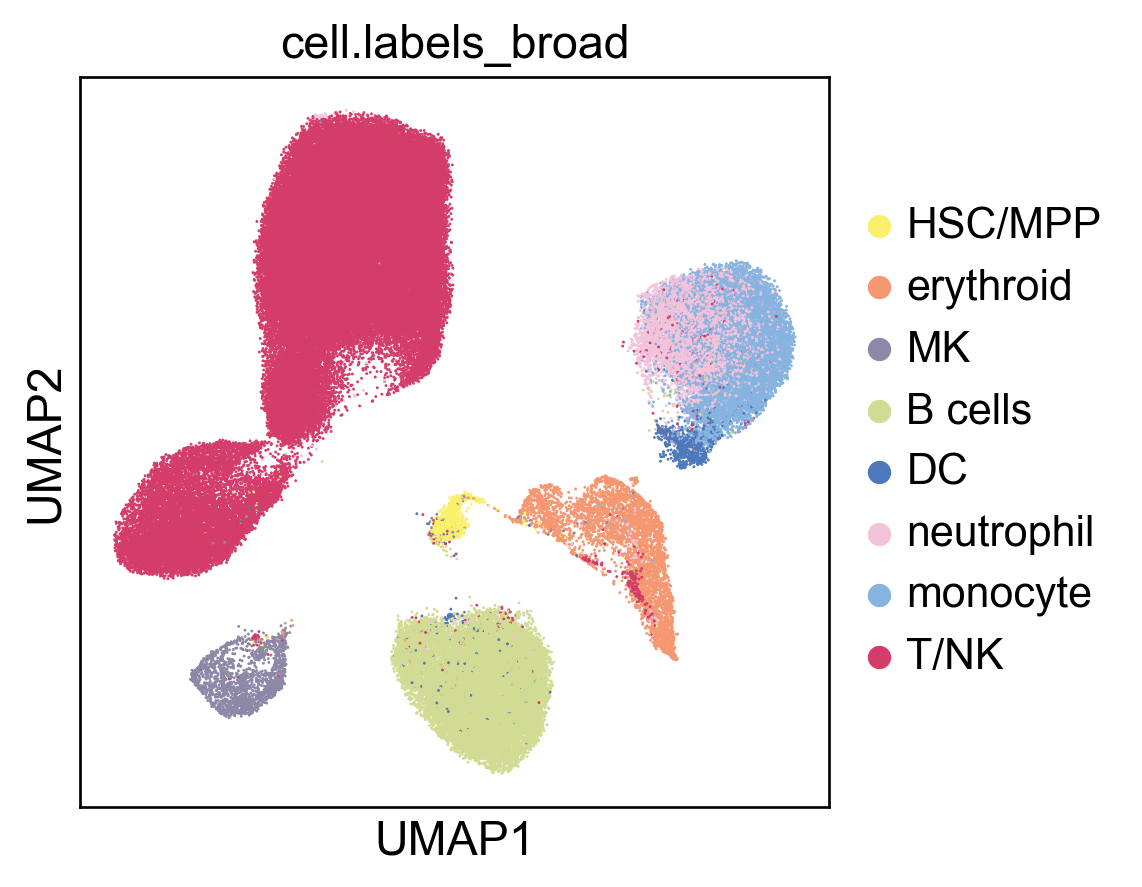

In [36]:
sc.pl.umap(adata, color=['cell.labels_broad'], size=3)

In [37]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_cb_post-harmony_20200721_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_cb_post-harmony_20200721_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='cell.labels_broad', save='_cb_post-harmony_20200721_labels_broad_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels_broad', save='_cb_post-harmony_20200721_labels_broad_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sample', save='_cb_post-harmony_20200721_sample_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='sample', save='_cb_post-harmony_20200721_sample_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

# Save the data

In [38]:
pd.DataFrame(adata.obs).to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/cb_meta_20200721.csv")

In [39]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [40]:
adata.X

<148442x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 110966124 stored elements in Compressed Sparse Row format>

In [41]:
adata.raw.X

<148442x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 118663237 stored elements in Compressed Sparse Row format>

In [42]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs1e_cb_scaled_gex_updated_dr_20200721.h5ad")

In [43]:
adata.shape

(148442, 33694)